# Google Play Store Apps Dataset For Predicting Rating and Analysing the top five categorices.

Importing the Dependent Libraries

In [1]:
import pandas as pd
import numpy as np

import random

import warnings
warnings.filterwarnings("ignore")

import re
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing

In [2]:
pwd

'C:\\Users\\Suhal'

In [3]:
df = pd.read_csv('C:\\Users\\Suhal\\Desktop\\MS In DA\\Data Sets\\google-play-store-apps\\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Total number of rows is 10,000+ and 13 columns

df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#List of columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#Excluding the non predictive columns 

df1 = df.drop(['Last Updated','Current Ver','Android Ver'],axis='columns')
df1.shape

(10841, 10)

In [8]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


# Exploratory Data Analysis

In [9]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [10]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].median())

In [11]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
dtype: int64

In [12]:
df1 = df1.dropna()

In [13]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [14]:
df1 = df1[pd.notnull(df['Content Rating'])]

Checking Normal Distribution of Dependent Varaible

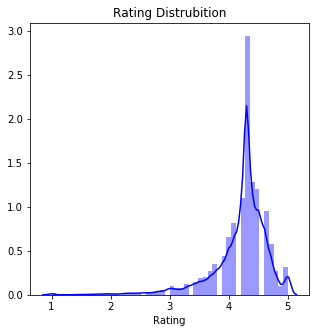

In [15]:
#Distribution plot for Rating 

plt.figure(figsize=(5,5))
sns.distplot(df1['Rating'],color='b');
plt.title("Rating Distrubition")
plt.show()

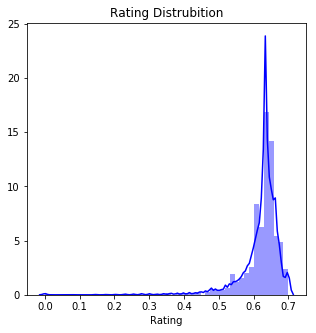

In [16]:
y=np.log10(df1.Rating)

plt.figure(figsize=(5,5))
sns.distplot(y,color='b');
plt.title("Rating Distrubition")
plt.show()

In [17]:
#Converting the installs value into a fit data

df1['Installs'] = df1['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [18]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity


In [19]:
#Giving labels to the Content Rating

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df1['Content Rating'] = le.fit_transform(df1['Content Rating'])

In [20]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,1,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,1,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,1,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,1,Art & Design;Creativity


In [23]:
df1['Type'].unique()

array([0, 1], dtype=int64)

In [24]:
#Giving labels to the Type

le = preprocessing.LabelEncoder()
df1['Type'] = le.fit_transform(df1['Type'])

In [25]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0,0,1,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0,0,1,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,0,1,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0,0,4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0,0,1,Art & Design;Creativity


In [26]:
#Coverting the price value to the float 

def price_float(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df1['Price'] = df1['Price'].map(price_float).astype(float)

In [27]:
df1[df1['Price'] > 1].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,1,4.99,1,Business
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,1,4.99,1,Business
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,1,4.99,1,Business
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,1,4.99,1,Business
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,1,3.99,1,Communication


In [28]:
df1['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [29]:
# Genres features encoding

le = preprocessing.LabelEncoder()
df1['Genres'] = le.fit_transform(df1['Genres'])

In [30]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0,0.0,1,9
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0,0.0,1,12
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,0.0,1,9
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0,0.0,4,9
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0,0.0,1,11


In [31]:
# Convert kbytes to Mbytes 

k_indices = df1['Size'].loc[df1['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df1.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))

df1.loc[k_indices,'Size'] = converter

In [32]:
# Size cleaning

df1['Size'] = df1['Size'].apply(lambda x: x.strip('M'))
df1[df1['Size'] == 'Varies with device'] = 0
df1['Size'] = df1['Size'].astype(float)

# One hot encoding for the Category

In [33]:
#Using one hot encoding for the Category

dummies = pd.get_dummies(df1.Category)
dummies.head(3)

,0,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df2 = pd.concat([df1,dummies],axis="columns")
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,1,11,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dfapp = df2["App"]

In [36]:
dfcat = df2["Category"]

In [37]:
df2 = df2.drop(['App','Category'],axis='columns')

In [38]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,0,ART_AND_DESIGN,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19.0,10000,0,0.0,1,9,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.0,500000,0,0.0,1,12,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7,5000000,0,0.0,1,9,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25.0,50000000,0,0.0,4,9,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8,100000,0,0.0,1,11,0,1,...,0,0,0,0,0,0,0,0,0,0


# Correlation Matrix

In [39]:
corr = df2.corr()
corr

,Rating,Size,Type,Price,Content Rating,Genres,0,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Rating,1.000000,0.355186,0.121755,0.020338,0.482802,0.569331,-0.956974,0.039090,0.033258,0.031338,...,0.090335,0.060345,0.068301,0.060281,0.064114,0.074144,0.087392,0.046242,0.036093,0.032414
Size,0.355186,1.000000,0.013915,-0.012019,0.317069,0.122905,-0.352416,-0.019783,0.007091,-0.012971,...,-0.056906,-0.005491,-0.039566,-0.012266,-0.002991,0.047952,-0.114483,0.039378,-0.010322,-0.016495
Type,0.121755,0.013915,1.000000,0.234217,0.019488,0.069902,-0.115147,-0.005593,-0.013417,-0.017656,...,0.114785,0.004968,0.008431,-0.031297,-0.029563,0.002715,0.028790,-0.007913,-0.026210,0.011203
Price,0.020338,-0.012019,0.234217,1.000000,-0.000612,0.014051,-0.026969,-0.004295,-0.004429,-0.004135,...,-0.006850,-0.004952,-0.002450,-0.008378,-0.008138,-0.007754,-0.011511,-0.006706,-0.006878,-0.002681
Content Rating,0.482802,0.317069,0.019488,-0.000612,1.000000,0.207288,-0.499673,-0.004443,-0.013444,0.008690,...,0.045682,-0.006160,-0.023147,0.029329,0.190091,-0.009102,-0.049268,-0.021123,0.015860,-0.006915
Genres,0.569331,0.122905,0.069902,0.014051,0.207288,1.000000,-0.607538,-0.088627,-0.089233,-0.068808,...,0.128184,0.111991,0.127070,0.153710,0.175701,0.219371,0.388019,0.199728,0.176173,0.121543
0,-0.956974,-0.352416,-0.115147,-0.026969,-0.499673,-0.607538,1.000000,-0.032645,-0.035926,-0.028403,...,-0.079198,-0.066671,-0.072987,-0.059161,-0.060496,-0.073973,-0.116420,-0.057797,-0.047604,-0.031293
ART_AND_DESIGN,0.039090,-0.019783,-0.005593,-0.004295,-0.004443,-0.088627,-0.032645,1.000000,-0.006331,-0.005005,...,-0.013957,-0.011749,-0.012863,-0.010426,-0.010661,-0.013036,-0.020517,-0.010186,-0.008389,-0.005515
AUTO_AND_VEHICLES,0.033258,0.007091,-0.013417,-0.004429,-0.013444,-0.089233,-0.035926,-0.006331,1.000000,-0.005509,...,-0.015360,-0.012930,-0.014156,-0.011474,-0.011733,-0.014347,-0.022579,-0.011209,-0.009233,-0.006069
BEAUTY,0.031338,-0.012971,-0.017656,-0.004135,0.008690,-0.068808,-0.028403,-0.005005,-0.005509,1.000000,...,-0.012144,-0.010223,-0.011191,-0.009071,-0.009276,-0.011342,-0.017851,-0.008862,-0.007299,-0.004798


# Building Model and Evalution Matrix

In [40]:
# Split data into training and testing sets
X = df2.drop(['Rating'],axis='columns')
X.head(5)

,Reviews,Size,Installs,Type,Price,Content Rating,Genres,0,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,159,19.0,10000,0,0.0,1,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14.0,500000,0,0.0,1,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8.7,5000000,0,0.0,1,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25.0,50000000,0,0.0,4,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2.8,100000,0,0.0,1,11,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df2.Rating
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [42]:
#Spliting data into test and train

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

Random Forest Regressor Model and Evalution

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

Y_rf_pred = rf.predict(X_test)

Y_rf_x_pred = rf.predict(X_train)

In [44]:
r2 = r2_score(y_test,Y_rf_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  92.53498960671017


In [45]:
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,Y_rf_x_pred)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,Y_rf_pred)).astype(str))

RMSE value of Training dataset:0.18734660662762212
RMSE value of testing dataset:0.4413690235213038


In [46]:
acc = rf.score(X_train,y_train)
print('Accuracy: ',acc*100)

Accuracy:  98.59930962341653


In [47]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(rf, X_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())

0.9152792788157554


Linear Regression Model and Evalution

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

Y_lr_pred = lr.predict(X_test)

Y_lr_x_pred = lr.predict(X_train)

In [49]:
r2 = r2_score(y_test,Y_lr_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  92.29573332414695


In [50]:
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,Y_lr_x_pred)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,Y_lr_pred)).astype(str))

RMSE value of Training dataset:0.4564180215877844
RMSE value of testing dataset:0.44838625913092456


In [51]:
acc = lr.score(X_train,y_train)
print('Accuracy: ',acc*100)

Accuracy:  91.68665027594588


In [52]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(lr, X_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())

0.9155406314113127


In [53]:
dfrating = pd.Series(Y_rf_pred)

In [54]:
dftop = pd.concat([dfapp,dfrating,dfcat],axis="columns")

In [55]:
dftop.head()

,App,0,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.58,ART_AND_DESIGN
1,Coloring book moana,4.08,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.01,ART_AND_DESIGN
3,Sketch - Draw & Paint,4.44,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.53,ART_AND_DESIGN


In [56]:
dftop = dftop.rename(columns={0:'Predicated_Rating'})

In [57]:
dftop.head()

,App,Predicated_Rating,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.58,ART_AND_DESIGN
1,Coloring book moana,4.08,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.01,ART_AND_DESIGN
3,Sketch - Draw & Paint,4.44,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.53,ART_AND_DESIGN


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
cf.go_offline()

In [59]:
top = pd.pivot_table(data = dftop, index = 'Category', values = 'Predicated_Rating' , aggfunc = np.sum).reset_index()
top = top.sort_values(by = 'Predicated_Rating', ascending = False).reset_index(drop=True)
top.head(5).iplot(kind = 'pie', labels= 'Category', values= 'Predicated_Rating', title = 'Top Cateogries' )